In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import log_loss
from sklearn import metrics
from sklearn.model_selection import KFold

In [2]:
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/content/drive/MyDrive/ALL_DATA_ML/ALL_DATA_ML/SpeechToGender/scaled_voice_data.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,kurt,sp.ent,sfm,mode,meanfun,minfun,modindx,gender
0,0.053833,0.182412,-0.043344,-0.211354,0.539997,0.538854,-0.240888,0.835319,-0.042416,0.207412,-0.837226,0.540973,-0.366495,male
1,-1.948336,1.299573,-2.059818,-1.855442,-0.519379,1.824196,0.163259,1.025120,1.077412,-2.141210,-1.247501,-1.089900,0.159773,male
2,0.646042,0.495259,0.871554,0.640148,1.145548,-0.095419,-0.201828,0.608758,0.670084,0.694611,0.648140,0.567828,-0.761240,female
3,0.676572,-0.985618,0.417501,0.876052,-0.107268,-1.056066,-0.218332,-0.515259,-0.533573,0.230766,0.775463,0.602869,-0.112419,female
4,0.945822,-0.909062,0.667029,1.041938,0.402815,-0.962975,-0.219860,-0.715600,-0.588908,0.517069,0.611636,0.652038,-0.295663,female


In [3]:
x = df.drop('gender',axis=1)
y = df['gender']
x.head()

,meanfreq,sd,median,Q25,Q75,IQR,kurt,sp.ent,sfm,mode,meanfun,minfun,modindx
0,0.053833,0.182412,-0.043344,-0.211354,0.539997,0.538854,-0.240888,0.835319,-0.042416,0.207412,-0.837226,0.540973,-0.366495
1,-1.948336,1.299573,-2.059818,-1.855442,-0.519379,1.824196,0.163259,1.025120,1.077412,-2.141210,-1.247501,-1.089900,0.159773
2,0.646042,0.495259,0.871554,0.640148,1.145548,-0.095419,-0.201828,0.608758,0.670084,0.694611,0.648140,0.567828,-0.761240
3,0.676572,-0.985618,0.417501,0.876052,-0.107268,-1.056066,-0.218332,-0.515259,-0.533573,0.230766,0.775463,0.602869,-0.112419
4,0.945822,-0.909062,0.667029,1.041938,0.402815,-0.962975,-0.219860,-0.715600,-0.588908,0.517069,0.611636,0.652038,-0.295663


In [4]:
y.head()

,gender
0,male
1,male
2,female
3,female
4,female


In [4]:
def perform_svm(x_train, y_train, x_test, y_test, i, k, kernel, display_stats=False):
    svm_model = SVC(kernel=kernel)
    svm_model.fit(x_train, y_train)
    y_pred = svm_model.predict(x_test)

    # Accuracy, Precision, Recall, F1-score of Model
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred, average='weighted')
    recall = metrics.recall_score(y_test, y_pred, average='weighted')
    f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

    if display_stats:
        print(f"Statistics for Fold {i} in K-fold (k={k}) 'Logistic Regression' algorithm")
        print(f"Accuracy: {accuracy}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1-score: {f1_score}")
        print()

    return np.array([accuracy, precision, recall, f1_score])

In [5]:
def runKFoldForActivation(kernel):
    k = 10
    i = 0
    k_fold = KFold(n_splits=k)

    # Holds Mean of {accuracy, precision, recall, f1_score}
    mean_stats = np.zeros(4)

    for train_index, test_index in k_fold.split(x):
        x_train, x_test = x.loc[train_index], x.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]

        stats = perform_svm(x_train, y_train, x_test, y_test, i:=i+1, k, display_stats=False,
                                            kernel=kernel)
        mean_stats = mean_stats + stats

    # Take mean of {accuracy, precision, recall, f1_score}
    mean_stats = mean_stats / k

    print(f"Mean accuracy: {mean_stats[0]*100}")
    print(f"Mean Precision: {mean_stats[1]*100}")
    print(f"Mean Recall: {mean_stats[2]*100}")
    print(f"MeanF1-score: {mean_stats[3]*100}")

In [7]:
runKFoldForActivation('linear')

Mean accuracy: 97.5383340654075
Mean Precision: 97.55326124357792
Mean Recall: 97.5383340654075
MeanF1-score: 97.53895558284148


In [8]:
runKFoldForActivation('poly')

Mean accuracy: 95.83356626602244
Mean Precision: 95.95715635633614
Mean Recall: 95.83356626602244
MeanF1-score: 95.83310678654658


In [6]:
runKFoldForActivation('rbf')

Mean accuracy: 98.07481132452182
Mean Precision: 98.09111022287436
Mean Recall: 98.07481132452182
MeanF1-score: 98.0752405183399


In [10]:
runKFoldForActivation('sigmoid')

Mean accuracy: 88.19420596573892
Mean Precision: 88.31710922536583
Mean Recall: 88.19420596573892
MeanF1-score: 88.19939735087827


In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn import metrics

In [8]:
le = LabelEncoder()
Y_encoded = le.fit_transform(y)
xtrain_roc, xtest_roc, ytrain_roc, ytest_roc = train_test_split(x, Y_encoded, test_size=0.2)
def roc_auc(y_test, y_pred):
    fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(8,8))
    lisrt=['male','female']
    for m in range(2):
        ls=[]
        for j in y_test:
            if m==j:
                ls.append(1)
            else:
                ls.append(0)

        fpr, tpr, thresh =  metrics.roc_curve(ls,y_pred[:,m])
        auc = metrics.roc_auc_score(ls,y_pred[:,m])
        axes[m].plot(fpr, tpr,  label="AUC = " +str(auc), linestyle='--',color='red')
        axes[m].set_title(f'ROC-AUC curve for class {lisrt[m]}')
        axes[m].set_xlabel('False Positive Rate')
        axes[m].set_ylabel('True Positive rate')
        axes[m].legend(lisrt[m])
        axes[m].text(0.5,0.0, f'AUC value :{auc}')
        plt.tight_layout()

Accuracy Score : 0.9763406940063092


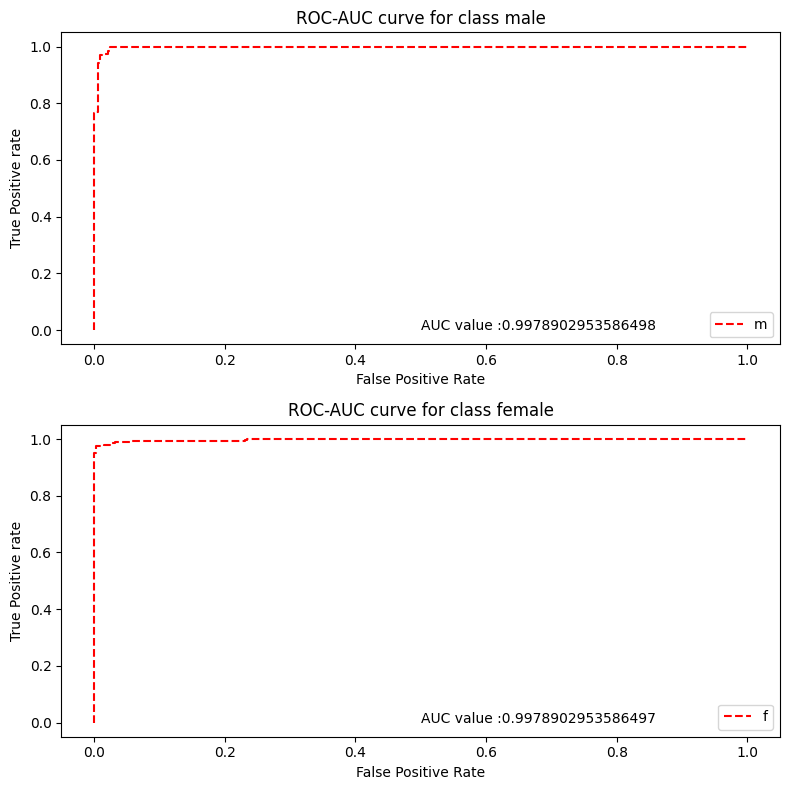

In [12]:
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(xtrain_roc, ytrain_roc)
ypred_roc = svm_model.predict_proba(xtest_roc)

print('Accuracy Score :', svm_model.score(xtest_roc, ytest_roc))

roc_auc(ytest_roc, ypred_roc)

In [9]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/ALL_DATA_ML/ALL_DATA_ML/SpeechToGender/feature_selected_voice_data.csv'  # Adjust if file path differs
data = pd.read_csv(file_path)

# Inspect the first few rows to see feature names
print(data.head())


   meanfreq        sd    median       Q25       Q75       IQR         kurt  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122   274.402906   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252   634.613855   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  1024.927705   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374     4.177296   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325     4.333713   

     sp.ent       sfm      mode   meanfun    minfun   modindx label  
0  0.893369  0.491918  0.000000  0.084279  0.015702  0.000000  male  
1  0.892193  0.513724  0.000000  0.107937  0.015826  0.052632  male  
2  0.846389  0.478905  0.000000  0.098706  0.015656  0.046512  male  
3  0.963322  0.727232  0.083878  0.088965  0.017798  0.247119  male  
4  0.971955  0.783568  0.104261  0.106398  0.016931  0.208274  male  


In [10]:
import numpy as np

def predict_gender_manual(features, model, scaler=None):
    """
    Predicts the gender based on manually provided features.

    Parameters:
    - features (list or np.array): List or array of feature values in the correct order.
    - model (sklearn model): Trained SVM model.
    - scaler (sklearn scaler, optional): Scaler used for preprocessing (if dataset was scaled).

    Returns:
    - str: Predicted gender ('male' or 'female').
    """
    # Ensure input is a NumPy array
    input_features = np.array(features).reshape(1, -1)

    # Scale input if a scaler is provided
    if scaler:
        input_features = scaler.transform(input_features)

    # Predict gender
    prediction = model.predict(input_features)
    return "male" if prediction[0] == 1 else "female"


In [14]:
# Example: Extracting features from a dataset row
sample_row = data.iloc[0]  # First row of the dataset
sample_features = sample_row[:-1].values  # All except the label column

# Predict gender for this sample
predicted_gender = predict_gender_manual(sample_features, svm_model, scaler=None)
print(f"Predicted Gender: {predicted_gender}")


Predicted Gender: female


In [15]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def get_trained_svm_model(data, label_column, kernel='rbf', test_size=0.2, random_state=42):
    """
    Trains an SVM model on the provided dataset and returns the trained model and scaler.

    Parameters:
    - data (pd.DataFrame): Dataset containing features and labels.
    - label_column (str): Name of the column containing labels.
    - kernel (str): Kernel type for SVM. Default is 'rbf'.
    - test_size (float): Proportion of the dataset to include in the test split.
    - random_state (int): Random state for reproducibility.

    Returns:
    - model (SVC): Trained SVM model.
    - scaler (StandardScaler): Scaler used for preprocessing.
    """
    # Separate features and labels
    X = data.drop(columns=[label_column])
    y = data[label_column]

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train the SVM model
    model = SVC(kernel=kernel, probability=True)
    model.fit(X_train_scaled, y_train)

    print("SVM model trained successfully.")
    return model, scaler
